Titanic sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv("./titanic_train.csv")
print(titanic_df.info())
titanic_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Pclass: 선실 등급
SibSp: 동승한 형제자매, 배우자 수
Parch: 동승한 부모님, 어린이 수


NULL컬럼들 처리

In [2]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True) #NaN부분을 나이의 평균값으로 채워줌
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)

In [3]:
print(titanic_df.info())
print("NULL개수:",titanic_df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
NULL개수: PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [4]:
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1] #Cabin값에 중복된 부분이 있어서 Cabin을 종류별로 나누기위해
print(titanic_df['Cabin'].value_counts())

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64


In [5]:
titanic_df.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

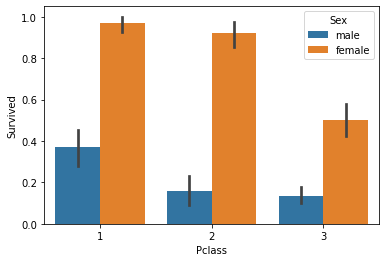

In [6]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data = titanic_df) #hue: 동시비교

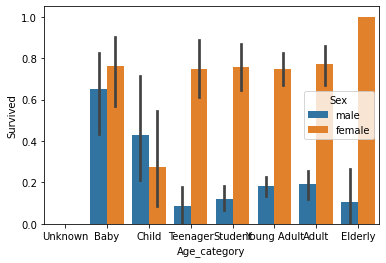

In [7]:
def get_category(age):
    category = ''
    if age<= -1: category = 'Unknown'
    elif age <= 5: category = 'Baby'
    elif age <= 12: category = 'Child'
    elif age <= 18: category = 'Teenager'
    elif age <= 25: category = 'Student'
    elif age <= 35: category = 'Young Adult'
    elif age <= 60: category = 'Adult'
    else: category = 'Elderly'
    
    return category

group_names = ['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Elderly']
titanic_df['Age_category'] = titanic_df['Age'].apply(lambda x: get_category(x))
sns.barplot(x = 'Age_category', y='Survived', hue='Sex', data = titanic_df, order = group_names)
titanic_df.drop('Age_category',axis=1,inplace=True)

In [8]:
from sklearn import preprocessing

def encode_features(dataF):
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataF[feature])
        dataF[feature] = le.transform(dataF[feature])
    return dataF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [9]:
from sklearn.preprocessing import LabelEncoder

#NULL처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    return df

#불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

#레이블 인코딩
def encode(df):
    df['Cabin'] =df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#앞의 함수들 한번에 호출
def transform_feature(df):
    df = fillna(df)
    df = drop_features(df)
    df = encode(df)
    return df

In [10]:
titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_feature(X_titanic_df)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)

rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)

lr_clf = LogisticRegression(max_iter=1000)
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)

print("df Accuracy is:{}".format(accuracy_score(y_test, dt_pred)))
print("rf Accuracy is:{}".format(accuracy_score(y_test, rf_pred)))
print("lr Accuracy is:{}".format(accuracy_score(y_test, lr_pred)))

df Accuracy is:0.7877094972067039
rf Accuracy is:0.8547486033519553
lr Accuracy is:0.8491620111731844


In [23]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    kfold = KFold(n_splits=folds)
    scores = []
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        accuracy = accuracy_score(pred, y_test)
        scores.append(accuracy)
        print("{}번째 {}".format(iter_count,accuracy))
    mean_score = np.mean(scores)
    print("average accuracy:{}".format(mean_score))

exec_kfold(rf_clf, folds=5)

0번째 0.7932960893854749
1번째 0.8089887640449438
2번째 0.8370786516853933
3번째 0.7752808988764045
4번째 0.8595505617977528
average accuracy:0.8148389931579938
